In [1]:
from mne_connectivity.viz import plot_connectivity_circle
from mne.viz import circular_layout
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# Figure 4 B

## Preprocessing

Please contact the corresponding author, Sungshin Kim (sungshinkim@hanyang.ac.kr), or the first author, Junghyun Kim (juhng62@gmail.com) to get raw data.

In [2]:
# connectivity matrix
con = np.zeros((4, 6, 6))

0: dorsal - M1 / 1: dorsal - premotor / 2: dorsal - ventral / 3: dorsal - S1 / 4: dorsal - early / 5: M1 - premotor / 6: M1 - ventral / 7: M1 - S1 / 8: M1 - early / 9: premotor - ventral / 10: premotor - S1 / 11: premotor - early / 12: ventral - S1 / 13: ventral - early / 14: S1 - early

In [3]:
# z = Fisher's z transformation
np.load('../data/02z.FB.group.main.002.npy')

array([ 0.27264449,  0.35393026,  0.55040029,  0.04721432,  0.04208675,
        0.39381951,  0.29124201,  0.04681315, -0.0652815 ,  0.38264089,
        0.06367855, -0.05068017,  0.08878187, -0.01711081,  0.27607802])

In [4]:
con[0,3,:3] = [0.35393026, 0.38264089, -0.05068017]
con[0,4,:3] = [0.27264449, 0.29124201, -0.0652815]
con[0,5,:3] = [0.04721432, 0.08878187, 0.27607802]

In [5]:
np.load('../data/02z.FB.group.main.005.npy')

array([ 0.26555908,  0.27535199,  0.46900917,  0.13719218,  0.06356317,
        0.42306342,  0.31175889,  0.1327639 , -0.05169612,  0.32171206,
        0.11942954, -0.05748081,  0.22423659, -0.01432613,  0.09456112])

In [6]:
con[1,3,:3] = [0.27535199, 0.32171206, -0.05748081]
con[1,4,:3] = [0.26555908, 0.31175889, -0.05169612]
con[1,5,:3] = [0.1327639, 0.22423659, 0.09456112]

In [7]:
np.load('../data/02z.nFB.group.main.002.npy')

array([ 0.24183764,  0.28440907,  0.50374626, -0.06786776, -0.04004819,
        0.44247161,  0.34746483,  0.06143143, -0.10850089,  0.35933791,
       -0.01281481, -0.08428724, -0.02895431, -0.17380085,  0.12958169])

In [8]:
con[2,3,:3] = [0.28440907, 0.35933791, -0.08428724]
con[2,4,:3] = [0.24183764, 0.34746483, -0.10850089]
con[2,5,:3] = [-0.06786776, -0.02895431, 0.12958169]

In [9]:
np.load('../data/02z.nFB.group.main.005.npy')

array([ 0.21832765,  0.24376988,  0.42808637, -0.07114298,  0.09683865,
        0.39393215,  0.28669598,  0.09827971, -0.0543673 ,  0.28375799,
        0.02855979, -0.05801237,  0.02865029, -0.01739223,  0.10258665])

In [10]:
con[3,3,:3] = [0.24376988, 0.28375799, -0.05801237]
con[3,4,:3] = [0.21832765, 0.28669598, -0.0543673]
con[3,5,:3] = [-0.07114298, 0.02865029, 0.10258665]

## Graph

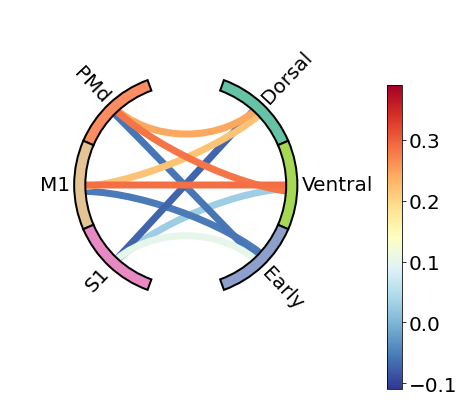

(<Figure size 576x576 with 2 Axes>, <PolarAxesSubplot:>)

In [11]:
node_names = ['Dorsal', 'Ventral', 'Early', 'PMd', 'M1', 'S1']
node_order = ['PMd', 'M1', 'S1', 'Early', 'Ventral', 'Dorsal']
node_angles = circular_layout(node_names, node_order, start_pos=90,
                              group_boundaries=[0, len(node_names) / 2], group_sep=40)
color = sns.color_palette("Set2")

# CHANGE con[?]
plot_connectivity_circle(con=con[3], node_names=node_names, n_lines=9, node_angles=node_angles, \
                         node_colors=[color[0], color[4], color[2], color[1], color[6], color[3]], \
                         facecolor='white', textcolor='black', linewidth=7, colormap='RdYlBu_r', \
                         vmin=-0.11, vmax=0.39, fontsize_names=20,
                         colorbar=True, colorbar_size=0.7, fontsize_colorbar=20)

# fname = '/Users/clmn/Desktop/Andy/Masters/Articles/GL/figures/fig3/fig3B/fig3B1.png'
# plt.savefig(fname, dpi=600)

## T-test
To check if there is difference in correlations between the first run and the last run.

### Preprocessing

0: dorsal - M1 / 1: dorsal - premotor / 2: dorsal - ventral / 3: dorsal - S1 / 4: dorsal - early / 5: M1 - premotor / 6: M1 - ventral / 7: M1 - S1 / 8: M1 - early / 9: premotor - ventral / 10: premotor - S1 / 11: premotor - early / 12: ventral - S1 / 13: ventral - early / 14: S1 - early

In [12]:
# # index_dir = '/home/kjh/Desktop/GL_KJH/index'
# # corr_atlas_dir = '/mnt/ext6/GL_KJH/connectivity/correlations/Peak_GL02_cluster'
# # subj_list = np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str')

# index_dir = '/Users/clmn/Desktop/GL_FS/GLFS02/index'
# corr_atlas_dir = '/Users/clmn/Desktop/GL_FS/GLFS02/connectivity/correlations/Peak_GL02_cluster'
# subj_list = np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str')

# radius = '3'
# corr_num = '02'
# corr_dir = os.path.join(corr_atlas_dir, radius, corr_num)

# cond_list = ['CF', 'BF']
# run_list = [2, 5]
# roi_list = ['dorsal_PMd', 'dorsal_M1', 'dorsal_S1', 'ventral_PMd', 'ventral_M1', 'ventral_S1', 
#             'early_PMd', 'early_M1', 'early_S1']

In [13]:
# df_corr_CF = pd.DataFrame()
# df_corr_BF = pd.DataFrame()

# df_corr_CF['subj'] = np.repeat(np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str'), 9*2)
# df_corr_BF['subj'] = np.repeat(np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str'), 9*2)

# df_corr_CF['roi'] = np.tile(np.repeat(np.array(roi_list), 2), 24)
# df_corr_BF['roi'] = np.tile(np.repeat(np.array(roi_list), 2), 24)

# df_corr_CF['run'] = np.tile(np.array(run_list), 24*9)
# df_corr_BF['run'] = np.tile(np.array(run_list), 24*9)

# # df_corr_CF

In [14]:
# corr_CF_col = []
# for subj in subj_list:
#     for roi in roi_list:
#         if roi == 'dorsal_PMd':
#             i = 1
#         elif roi == 'dorsal_M1':
#             i = 0
#         elif roi == 'dorsal_S1':
#             i = 3
#         elif roi == 'ventral_PMd':
#             i = 9
#         elif roi == 'ventral_M1':
#             i = 6
#         elif roi == 'ventral_S1':
#             i = 12
#         elif roi == 'early_PMd':
#             i = 11
#         elif roi == 'early_M1':
#             i = 8
#         elif roi == 'early_S1':
#             i = 14
            
#         for run in run_list:
#             data = np.load(os.path.join(corr_dir, f'{corr_num}z.FB.{subj}.main.00{run}.npy'))
            
#             corr_CF_col.append(data[i])

# df_corr_CF['corr'] = corr_CF_col

In [15]:
# corr_BF_col = []
# for subj in subj_list:
#     for roi in roi_list:
#         if roi == 'dorsal_PMd':
#             i = 1
#         elif roi == 'dorsal_M1':
#             i = 0
#         elif roi == 'dorsal_S1':
#             i = 3
#         elif roi == 'ventral_PMd':
#             i = 9
#         elif roi == 'ventral_M1':
#             i = 6
#         elif roi == 'ventral_S1':
#             i = 12
#         elif roi == 'early_PMd':
#             i = 11
#         elif roi == 'early_M1':
#             i = 8
#         elif roi == 'early_S1':
#             i = 14
            
#         for run in run_list:
#             data = np.load(os.path.join(corr_dir, f'{corr_num}z.nFB.{subj}.main.00{run}.npy'))
            
#             corr_BF_col.append(data[i])

# df_corr_BF['corr'] = corr_BF_col
# df_corr_BF

In [16]:
# df_corr_CF.to_csv('../data/corr_CF.csv', index=False)
# df_corr_BF.to_csv('../data/corr_BF.csv', index=False)

In [17]:
df_corr_CF = pd.read_csv('../data/corr_CF.csv')
df_corr_BF = pd.read_csv('../data/corr_BF.csv')
df_corr_BF

,subj,roi,run,corr
0,GL03,dorsal_PMd,2,0.304060
1,GL03,dorsal_PMd,5,0.166149
2,GL03,dorsal_M1,2,0.202364
3,GL03,dorsal_M1,5,0.315530
4,GL03,dorsal_S1,2,-0.160713
...,...,...,...,...
427,GL29,early_PMd,5,0.157694
428,GL29,early_M1,2,-0.066721
429,GL29,early_M1,5,0.098461
430,GL29,early_S1,2,-0.048474


### Calculation

In [18]:
roi_list = ['dorsal_PMd', 'dorsal_M1', 'dorsal_S1', 'ventral_PMd', 'ventral_M1', 'ventral_S1', 
            'early_PMd', 'early_M1', 'early_S1']

for roi in roi_list:
    a = df_corr_CF[(df_corr_CF["run"] == 2) & (df_corr_CF["roi"] == roi)].groupby('subj')['corr'].mean()
    b = df_corr_CF[(df_corr_CF["run"] == 5) & (df_corr_CF["roi"] == roi)].groupby('subj')['corr'].mean()
    print(roi, ':', stats.ttest_rel(a, b), stats.ttest_rel(a, b)[1]*18)
    print()

dorsal_PMd : TtestResult(statistic=2.4244043215006403, pvalue=0.02359862034696272, df=23) 0.42477516624532896

dorsal_M1 : TtestResult(statistic=0.17826984638019602, pvalue=0.860071945663083, df=23) 15.481295021935495

dorsal_S1 : TtestResult(statistic=-2.2770955333046508, pvalue=0.03240140781873853, df=23) 0.5832253407372935

ventral_PMd : TtestResult(statistic=2.1044584073963515, pvalue=0.046470493808208294, df=23) 0.8364688885477493

ventral_M1 : TtestResult(statistic=-0.5619838402572066, pvalue=0.5795631242877948, df=23) 10.432136237180305

ventral_S1 : TtestResult(statistic=-3.212397262823865, pvalue=0.0038624920217223027, df=23) 0.06952485639100145

early_PMd : TtestResult(statistic=0.10876278426905303, pvalue=0.9143339626281536, df=23) 16.458011327306764

early_M1 : TtestResult(statistic=-0.4324143860821853, pvalue=0.6694676077583364, df=23) 12.050416939650054

early_S1 : TtestResult(statistic=5.115456287635196, pvalue=3.5046807926482195e-05, df=23) 0.0006308425426766795



In [19]:
for roi in roi_list:
    a = df_corr_BF[(df_corr_BF["run"] == 2) & (df_corr_BF["roi"] == roi)].groupby('subj')['corr'].mean()
    b = df_corr_BF[(df_corr_BF["run"] == 5) & (df_corr_BF["roi"] == roi)].groupby('subj')['corr'].mean()
    print(roi, ':', stats.ttest_rel(a, b), stats.ttest_rel(a, b)[1]*18)
    print()

dorsal_PMd : TtestResult(statistic=1.2564258706507332, pvalue=0.221573574146665, df=23) 3.9883243346399704

dorsal_M1 : TtestResult(statistic=0.6476978133588924, pvalue=0.523593736928293, df=23) 9.424687264709274

dorsal_S1 : TtestResult(statistic=0.046699420564206943, pvalue=0.9631559165355488, df=23) 17.336806497639877

ventral_PMd : TtestResult(statistic=2.123929697040449, pvalue=0.044646178221661816, df=23) 0.8036312079899127

ventral_M1 : TtestResult(statistic=2.3883378212362345, pvalue=0.02552228535816909, df=23) 0.4594011364470436

ventral_S1 : TtestResult(statistic=-1.7886127391361772, pvalue=0.08685852119979567, df=23) 1.563453381596322

early_PMd : TtestResult(statistic=-0.8207906214414911, pvalue=0.42019177638950966, df=23) 7.563451975011174

early_M1 : TtestResult(statistic=-1.6438588445789712, pvalue=0.11380680919709499, df=23) 2.0485225655477097

early_S1 : TtestResult(statistic=0.5837985756484585, pvalue=0.5650378752379459, df=23) 10.170681754283027



## Superior Parietal Lobule

### Preprocessing

0: SPL - dorsal / 1: SPL - M1 / 2: SPL - premotor / 3: SPL - ventral / 4: SPL - early / 5: SPL - S1

In [20]:
# # index_dir = '/home/kjh/Desktop/GL_KJH/index'
# # corr_atlas_dir = '/mnt/ext6/GL_KJH/connectivity/correlations/Peak_GL02_cluster'
# # subj_list = np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str')

# index_dir = '/Users/clmn/Desktop/GL_FS/GLFS02/index'
# corr_atlas_dir = '/Users/clmn/Desktop/GL_FS/GLFS02/connectivity/correlations/Peak_GL02_cluster'
# subj_list = np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str')

# radius = '3'
# corr_num = '02'
# corr_dir = os.path.join(corr_atlas_dir, radius, corr_num, 'SPL')

# cond_list = ['CF', 'BF']
# run_list = [2, 5]
# roi_list = ['SPL_PMd', 'SPL_M1', 'SPL_S1', 'SPL_dorsal', 'SPL_ventral', 'SPL_early']

In [21]:
# df_corr_CF_SPL = pd.DataFrame()
# df_corr_BF_SPL = pd.DataFrame()

# df_corr_CF_SPL['subj'] = np.repeat(np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str'), 6*2)
# df_corr_BF_SPL['subj'] = np.repeat(np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str'), 6*2)

# df_corr_CF_SPL['roi'] = np.tile(np.repeat(np.array(roi_list), 2), 24)
# df_corr_BF_SPL['roi'] = np.tile(np.repeat(np.array(roi_list), 2), 24)

# df_corr_CF_SPL['run'] = np.tile(np.array(run_list), 24*6)
# df_corr_BF_SPL['run'] = np.tile(np.array(run_list), 24*6)

# # df_corr_CF_SPL

In [22]:
# corr_CF_SPL_col = []
# for subj in subj_list:
#     for roi in roi_list:
#         if roi == 'SPL_PMd':
#             i = 2
#         elif roi == 'SPL_M1':
#             i = 1
#         elif roi == 'SPL_S1':
#             i = 5
#         elif roi == 'SPL_dorsal':
#             i = 0
#         elif roi == 'SPL_ventral':
#             i = 3
#         elif roi == 'SPL_early':
#             i = 4
            
#         for run in run_list:
#             data = np.load(os.path.join(corr_dir, f'{corr_num}.FB.{subj}.main.00{run}.npy'))
            
#             corr_CF_SPL_col.append(data[i])

# df_corr_CF_SPL['corr'] = corr_CF_SPL_col
# df_corr_CF_SPL

In [23]:
# corr_BF_SPL_col = []
# for subj in subj_list:
#     for roi in roi_list:
#         if roi == 'SPL_PMd':
#             i = 2
#         elif roi == 'SPL_M1':
#             i = 1
#         elif roi == 'SPL_S1':
#             i = 5
#         elif roi == 'SPL_dorsal':
#             i = 0
#         elif roi == 'SPL_ventral':
#             i = 3
#         elif roi == 'SPL_early':
#             i = 4
            
#         for run in run_list:
#             data = np.load(os.path.join(corr_dir, f'{corr_num}.nFB.{subj}.main.00{run}.npy'))
            
#             corr_BF_SPL_col.append(data[i])

# df_corr_BF_SPL['corr'] = corr_BF_SPL_col
# df_corr_BF_SPL

In [24]:
# df_corr_CF_SPL.to_csv('../data/corr_CF_SPL.csv', index=False)
# df_corr_BF_SPL.to_csv('../data/corr_BF_SPL.csv', index=False)

In [25]:
df_corr_CF_SPL = pd.read_csv('../data/corr_CF_SPL.csv')
df_corr_BF_SPL = pd.read_csv('../data/corr_BF_SPL.csv')
df_corr_BF_SPL

,subj,roi,run,corr
0,GL03,SPL_PMd,2,0.298623
1,GL03,SPL_PMd,5,0.108345
2,GL03,SPL_M1,2,0.180867
3,GL03,SPL_M1,5,0.162409
4,GL03,SPL_S1,2,-0.031727
...,...,...,...,...
283,GL29,SPL_dorsal,5,0.338516
284,GL29,SPL_ventral,2,0.497230
285,GL29,SPL_ventral,5,0.536099
286,GL29,SPL_early,2,0.250199


### T-test

In [26]:
roi_list = ['SPL_PMd', 'SPL_M1', 'SPL_S1', 'SPL_dorsal', 'SPL_ventral', 'SPL_early']

for roi in roi_list:
    a = df_corr_CF_SPL[(df_corr_CF_SPL["run"] == 2) & (df_corr_CF_SPL["roi"] == roi)].groupby('subj')['corr'].mean()
    b = df_corr_CF_SPL[(df_corr_CF_SPL["run"] == 5) & (df_corr_CF_SPL["roi"] == roi)].groupby('subj')['corr'].mean()
    print(roi, ':', stats.ttest_rel(a, b), stats.ttest_rel(a, b)[1]*(18+12))
    print()

SPL_PMd : TtestResult(statistic=2.8445952579626717, pvalue=0.009177181596474578, df=23) 0.27531544789423734

SPL_M1 : TtestResult(statistic=0.4575161911618597, pvalue=0.6515926281806949, df=23) 19.547778845420847

SPL_S1 : TtestResult(statistic=-0.027437101975848612, pvalue=0.9783477847445953, df=23) 29.350433542337857

SPL_dorsal : TtestResult(statistic=3.226327926350936, pvalue=0.003735854864236827, df=23) 0.11207564592710481

SPL_ventral : TtestResult(statistic=2.3921611991196254, pvalue=0.025311710192736245, df=23) 0.7593513057820873

SPL_early : TtestResult(statistic=-1.4096605612597735, pvalue=0.17201923407015354, df=23) 5.160577022104606



In [27]:
for roi in roi_list:
    a = df_corr_BF_SPL[(df_corr_BF_SPL["run"] == 2) & (df_corr_BF_SPL["roi"] == roi)].groupby('subj')['corr'].mean()
    b = df_corr_BF_SPL[(df_corr_BF_SPL["run"] == 5) & (df_corr_BF_SPL["roi"] == roi)].groupby('subj')['corr'].mean()
    print(roi, ':', stats.ttest_rel(a, b), stats.ttest_rel(a, b)[1]*(18+12))
    print()

SPL_PMd : TtestResult(statistic=1.7065147744338773, pvalue=0.10138059365594201, df=23) 3.0414178096782605

SPL_M1 : TtestResult(statistic=0.07328931059718602, pvalue=0.9422095499728722, df=23) 28.266286499186165

SPL_S1 : TtestResult(statistic=-2.4263896029196044, pvalue=0.023496725825232746, df=23) 0.7049017747569823

SPL_dorsal : TtestResult(statistic=2.031113336721077, pvalue=0.0539568601204283, df=23) 1.618705803612849

SPL_ventral : TtestResult(statistic=1.1098625371376434, pvalue=0.2785278291830024, df=23) 8.355834875490071

SPL_early : TtestResult(statistic=-0.9893610432621659, pvalue=0.33278132411944483, df=23) 9.983439723583345



# Figure 4 C

In [28]:
# 1. Import the Excel file
# file_path = "/mnt/ext6/GL_KJH/connectivity/GL_behavior_con.xlsx"
file_path = "../data/GL_S1_behavior_New.xlsx"

df = pd.read_excel(file_path)

# Reshape the data to a long format
df_melted = pd.melt(df, id_vars=["Unnamed: 0"], 
                    value_vars=[f"Y{i}" for i in range(1, 5)], 
                    var_name="Run", 
                    value_name="Y")

# Extracting XA, XB, and XC values for each functional run and participant
for prefix in ["XA", "XB", "XC"]:
    df_melted[prefix] = df_melted.apply(lambda row: df.at[row["Unnamed: 0"], f"{prefix}{row['Run'][1]}"], axis=1)

# Renaming the 'Unnamed: 0' column to 'Participant'
df_melted = df_melted.rename(columns={"Unnamed: 0": "Participant"})

# Displaying the reshaped dataframe
print(df_melted)

# Fitting the linear mixed-effects model
model_formula = "Y ~ XC"
lmm = smf.mixedlm(model_formula, df_melted, groups=df_melted["Participant"], re_formula="~XC").fit()

# Lmer('Y ~ XA', data=df_melted)
# Displaying the model summary
print(lmm.summary())

    Participant Run         Y        XA        XB        XC
0             0  Y1  0.173843  0.146982  0.115791  0.644033
1             1  Y1  0.396354  0.376907 -0.053285  0.146724
2             2  Y1  0.181944 -0.021800  0.128153  0.041311
3             3  Y1  0.134896 -0.028184  0.038865  0.446506
4             4  Y1  0.182350 -0.080488 -0.091887  0.152241
..          ...  ..       ...       ...       ...       ...
91           19  Y4  0.566898  0.147996  0.192875  0.132937
92           20  Y4  0.540625  0.188170  0.435882 -0.234357
93           21  Y4  0.384838 -0.056040 -0.063509  0.184424
94           22  Y4  0.386285  0.143907  0.292699  0.426889
95           23  Y4  0.478125  0.458497  0.536269  0.146814

[96 rows x 6 columns]


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Y      
No. Observations:   96       Method:              REML   
No. Groups:         24       Scale:               0.0113 
Min. group size:    4        Log-Likelihood:      55.8294
Max. group size:    4        Converged:           Yes    
Mean group size:    4.0                                  
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.430    0.034 12.704 0.000  0.364  0.496
XC             -0.367    0.082 -4.482 0.000 -0.528 -0.207
Group Var       0.018    0.091                           
Group x XC Cov -0.020    0.202                           
XC Var          0.022    0.679                           



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


In [29]:
lmm.params

Intercept         0.429857
XC               -0.367056
Group Var         1.610178
Group x XC Cov   -1.787561
XC Var            1.986766
dtype: float64

In [30]:
lmm.pvalues

Intercept         5.636406e-37
XC                7.404149e-06
Group Var         6.031644e-02
Group x XC Cov    3.482263e-01
XC Var            7.557848e-01
dtype: float64

/var/folders/5l/5jx0ryjd29d_6j6kvcyfc7cr0000gn/T/ipykernel_55483/1361942693.py:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df_melted, x="XC", y="Y", hue="Run", style='Run', palette=['gray'], markers=["o", "s", "^", "X"], s=70)


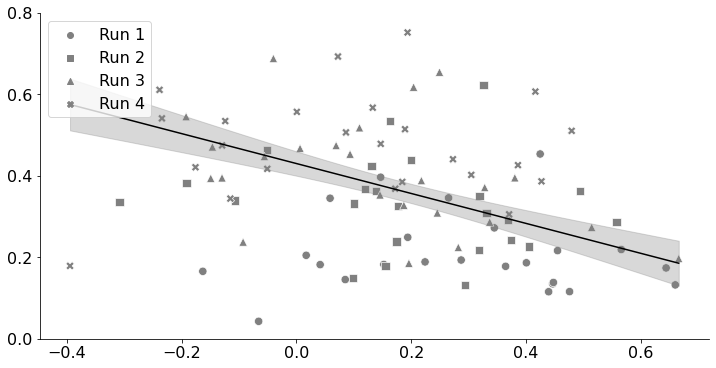

In [31]:
plt.figure(figsize=(12, 6))

ax = sns.scatterplot(data=df_melted, x="XC", y="Y", hue="Run", style='Run', palette=['gray'], markers=["o", "s", "^", "X"], s=70)

intercept_coeff = lmm.params['Intercept']
slope_coeff = lmm.params['XC']
std_err_intercept = lmm.bse['Intercept']
std_err_slope = lmm.bse['XC']

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py
x = df_melted.sort_values(by="XC")["XC"]
y_est = intercept_coeff + slope_coeff * x
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

ax.plot(np.array(x), np.array(y_est), '-', color='black')
ax.fill_between(x, y_est - y_err, y_est + y_err, color='gray', alpha=0.3)

for text, new in zip(plt.legend(fontsize=16, loc='upper left').texts, ['Run 1', 'Run 2', 'Run 3', 'Run 4']):
    text.set_text(new) 
    
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.yticks(np.arange(0, 0.81, 0.2))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# fname = '/Users/clmn/Desktop/Andy/Articles/2023/GL/figures/fig3/fig3C_2.png'
# plt.savefig(fname, dpi=600)
# plt.close()